# Módulo 1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos



```
# Abraham Gil Félix | A01750884
```



## Importación de librerías

In [ ]:
import os
import pydot 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import statsmodels.api as sm
from scipy.linalg import sqrtm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

## Carga de los datos

In [ ]:
# Montar Drive, permite hacer la conexión con Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carga del conjunto de datos
df_autos = pd.read_csv('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia artificial avanzada para la ciencia de datos I/M1 Estadística para la ciencia de datos/M1/Automobile.csv')

## Análisis exploratorio

In [ ]:
# Visualización de los datos 
df_autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# Conjunto de datos con 26 variables (numéricas y categóricas) y 205 registros
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   number-of-doors    205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Tipo de dato por cada variable del conjunto de datos
df_autos.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
number-of-doors       object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
# Variables del conjunto de datos
df_autos.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'number-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
### FALTA AGREGAR EL TIPO DE VARIABLE POR CATEGORIA 

### Variables numéricas
- symboling
- normalized-losses -> Convert to int
- wheel-base
- length
- width
- height
- curb-weight
- engine-size
- bore **
- stroke **
- compression-ratio
- horsepower
- peak-rpm
- city-mpg
- highway-mpg
- price

### Variables categóricas 
- make -> LabelEncoder
- fuel-type -> LabelEncoder / One Hot Encoding
- aspiration -> LabelEncoder / One Hot Encoding
- number-of-doors * -> LabelEncoder
- body-style * -> LabelEncoder
- drive-wheels * -> LabelEncoder
- engine-location * -> LabelEncoder
- engine-type * -> LabelEncoder
- num-of-cylinders * -> LabelEncoder
- fuel-system -> LabelEncoder

In [ ]:
# No existen valores vacíos en ninguna de las variables del conjunto de datos
# Sin embargo, existen variables con la entrada "?" en sus registros
df_autos.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
number-of-doors      0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Resumen estadístico de las variables numéricas del conjunto de datos
df_autos.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Partición de los datos

In [ ]:
# División del conjunto de datos de acuerdo al tipo de variable (dependiente o independiente)
y = df_autos[['price']]
X = df_autos[['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'number-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg',]]

In [ ]:
# Partición del conjunto de datos para entrenamiento y evaluación del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Transformación de los datos

### Valores Faltantes 

#### Conjuntos de entrenamiento

In [ ]:
# Visualización de los valores faltantes '?' en X_train
for i in X_train.columns:
    num = (X_train[i]=='?').sum()
    print('---------------------')
    print(str(i) + ': ' + str(num))

---------------------
symboling: 0
---------------------
normalized-losses: 32
---------------------
make: 0
---------------------
fuel-type: 0
---------------------
aspiration: 0
---------------------
number-of-doors: 2
---------------------
body-style: 0
---------------------
drive-wheels: 0
---------------------
engine-location: 0
---------------------
wheel-base: 0
---------------------
length: 0
---------------------
width: 0
---------------------
height: 0
---------------------
curb-weight: 0
---------------------
engine-type: 0
---------------------
num-of-cylinders: 0
---------------------
engine-size: 0
---------------------
fuel-system: 0
---------------------
bore: 3
---------------------
stroke: 3
---------------------
compression-ratio: 0
---------------------
horsepower: 2
---------------------
peak-rpm: 2
---------------------
city-mpg: 0
---------------------
highway-mpg: 0


In [ ]:
# Visualización de los valores faltantes '?' en y_train
for i in y_train.columns:
    num = (y_train[i]=='?').sum()
    print('---------------------')
    print(str(i) + ': ' + str(num))

---------------------
price: 2


#### Conjuntos de prueba

In [ ]:
# Visualización de los valores faltantes '?' en X_test
for i in X_test.columns:
    num = (X_test[i]=='?').sum()
    print('---------------------')
    print(str(i) + ': ' + str(num))

---------------------
symboling: 0
---------------------
normalized-losses: 9
---------------------
make: 0
---------------------
fuel-type: 0
---------------------
aspiration: 0
---------------------
number-of-doors: 0
---------------------
body-style: 0
---------------------
drive-wheels: 0
---------------------
engine-location: 0
---------------------
wheel-base: 0
---------------------
length: 0
---------------------
width: 0
---------------------
height: 0
---------------------
curb-weight: 0
---------------------
engine-type: 0
---------------------
num-of-cylinders: 0
---------------------
engine-size: 0
---------------------
fuel-system: 0
---------------------
bore: 1
---------------------
stroke: 1
---------------------
compression-ratio: 0
---------------------
horsepower: 0
---------------------
peak-rpm: 0
---------------------
city-mpg: 0
---------------------
highway-mpg: 0


In [ ]:
# Visualización de los valores faltantes '?' en y_test
for i in y_test.columns:
    num = (y_test[i]=='?').sum()
    print('---------------------')
    print(str(i) + ': ' + str(num))

---------------------
price: 2


### Reemplazo '?' por NaN

#### Conjuntos de entrenamiento

In [ ]:
# Reemplazo del caracter '?' por el valor np.NaN
for i in X_train.columns:
    X_train[i].replace(to_replace='?', value=np.NaN, inplace=True)

In [ ]:
# Valores faltantes NaN en X_train
X_train.isna().sum()

symboling             0
normalized-losses    32
make                  0
fuel-type             0
aspiration            0
number-of-doors       2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  3
stroke                3
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
dtype: int64

In [ ]:
# Porcentaje de valores faltantes en X_train
print(X_train.isna().sum()/X_train.shape[0])

symboling            0.000000
normalized-losses    0.209150
make                 0.000000
fuel-type            0.000000
aspiration           0.000000
number-of-doors      0.013072
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.019608
stroke               0.019608
compression-ratio    0.000000
horsepower           0.013072
peak-rpm             0.013072
city-mpg             0.000000
highway-mpg          0.000000
dtype: float64


In [ ]:
# Reemplazo del caracter '?' por el valor np.NaN
for i in y_train.columns:
    y_train[i].replace(to_replace='?', value=np.NaN, inplace=True)

In [ ]:
# Valores faltantes NaN en y_train
y_train.isna().sum()

price    2
dtype: int64

In [ ]:
# Porcentaje de valores faltantes en y_train
print(y_train.isna().sum()/y_train.shape[0])

price    0.013072
dtype: float64


#### Conjuntos de prueba

In [ ]:
# Reemplazo del caracter '?' por el valor np.NaN
for i in X_test.columns:
    X_test[i].replace(to_replace='?', value=np.NaN, inplace=True)

In [ ]:
# Valores faltantes NaN en X_test
X_test.isna().sum()

symboling            0
normalized-losses    9
make                 0
fuel-type            0
aspiration           0
number-of-doors      0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 1
stroke               1
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [ ]:
# Porcentaje de valores faltantes en X_test
print(X_test.isna().sum()/X_test.shape[0])

symboling            0.000000
normalized-losses    0.173077
make                 0.000000
fuel-type            0.000000
aspiration           0.000000
number-of-doors      0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.019231
stroke               0.019231
compression-ratio    0.000000
horsepower           0.000000
peak-rpm             0.000000
city-mpg             0.000000
highway-mpg          0.000000
dtype: float64


In [ ]:
# Reemplazo del caracter '?' por el valor np.NaN
for i in y_test.columns:
    y_test[i].replace(to_replace='?', value=np.NaN, inplace=True)

In [ ]:
# Valores faltantes NaN en y_test
y_test.isna().sum()

price    2
dtype: int64

In [ ]:
# Porcentaje de valores faltantes en y_test
print(y_test.isna().sum()/y_test.shape[0])

price    0.038462
dtype: float64


## Preprocesamiento y tratamiento valores faltantes 

### Variables independientes

#### Var. normalized-losses

In [ ]:
# Estadísticas descriptivas por variable
X_train['normalized-losses'].describe()

count     121
unique     47
top       161
freq        8
Name: normalized-losses, dtype: object

In [ ]:
# Valores únicos por variable
X_train['normalized-losses'].unique()

array(['128', '65', '103', nan, '134', '150', '161', '102', '194', '137',
       '188', '110', '186', '107', '91', '83', '104', '168', '85', '119',
       '148', '95', '154', '125', '78', '129', '118', '101', '192', '74',
       '158', '164', '94', '115', '87', '122', '93', '153', '145', '113',
       '256', '142', '90', '106', '108', '81', '231', '197'], dtype=object)

In [ ]:
# Reemplazo de valores faltantes por el valor único con mayor frecuencia en la variable
X_train['normalized-losses'].fillna('161', inplace=True)

In [ ]:
# Cambio del tipo de dato de objeto a entero
X_train['normalized-losses'] = X_train['normalized-losses'].astype(str).astype(int)

In [ ]:
# Estadísticas descriptivas por variable
X_test['normalized-losses'].describe()

count     43
unique    28
top       93
freq       3
Name: normalized-losses, dtype: object

In [ ]:
# Valores únicos por variable
X_test['normalized-losses'].unique()

array([nan, '106', '150', '93', '128', '91', '89', '122', '168', '118',
       '65', '74', '121', '125', '102', '115', '137', '148', '134', '103',
       '154', '81', '95', '161', '77', '83', '145', '98', '197'],
      dtype=object)

In [ ]:
# Reemplazo de valores faltantes por el valor único con mayor frecuencia en la variable
X_test['normalized-losses'].fillna('93', inplace=True)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_test['normalized-losses'] = X_test['normalized-losses'].astype(str).astype(int)

#### Var. make

In [ ]:
# Estadísticas descriptivas por variable
X_train['make'].describe()

count        153
unique        22
top       toyota
freq          23
Name: make, dtype: object

In [ ]:
# Valores únicos por variable
X_train['make'].unique()

array(['nissan', 'toyota', 'audi', 'mazda', 'porsche', 'mitsubishi',
       'subaru', 'mercury', 'honda', 'bmw', 'saab', 'peugot', 'plymouth',
       'dodge', 'volvo', 'alfa-romero', 'isuzu', 'volkswagen',
       'mercedes-benz', 'jaguar', 'renault', 'chevrolet'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['make'] = label_encoder.fit_transform(X_train['make']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['make'].describe()

count         52
unique        17
top       toyota
freq           9
Name: make, dtype: object

In [ ]:
# Valores únicos por variable
X_test['make'].unique()

array(['bmw', 'audi', 'nissan', 'saab', 'mercedes-benz', 'toyota',
       'subaru', 'volkswagen', 'mazda', 'chevrolet', 'mitsubishi',
       'honda', 'dodge', 'volvo', 'plymouth', 'isuzu', 'peugot'],
      dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['make'] = label_encoder.fit_transform(X_test['make']) 

#### Var. fuel-type

In [ ]:
# Estadísticas descriptivas por variable
X_train['fuel-type'].describe()

count     153
unique      2
top       gas
freq      140
Name: fuel-type, dtype: object

In [ ]:
# Valores únicos por variable
X_train['fuel-type'].unique()

array(['diesel', 'gas'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['fuel-type'] = label_encoder.fit_transform(X_train['fuel-type']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['fuel-type'].describe()

count      52
unique      2
top       gas
freq       45
Name: fuel-type, dtype: object

In [ ]:
# Valores únicos por variable
X_test['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['fuel-type'] = label_encoder.fit_transform(X_test['fuel-type']) 

#### Var. aspiration

In [ ]:
# Estadísticas descriptivas por variable
X_train['aspiration'].describe()

count     153
unique      2
top       std
freq      126
Name: aspiration, dtype: object

In [ ]:
# Valores únicos por variable
X_train['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['aspiration'] = label_encoder.fit_transform(X_train['aspiration']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['aspiration'].describe()

count      52
unique      2
top       std
freq       42
Name: aspiration, dtype: object

In [ ]:
# Valores únicos por variable
X_test['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['aspiration'] = label_encoder.fit_transform(X_test['aspiration']) 

#### Var. number-of-doors

In [ ]:
# Estadísticas descriptivas por variable
X_train['number-of-doors'].describe()

count      151
unique       2
top       four
freq        82
Name: number-of-doors, dtype: object

In [ ]:
# Valores únicos por variable
X_train['number-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [ ]:
# Reemplazo de valores faltantes por el valor único con mayor frecuencia en la variable
X_train['number-of-doors'].fillna('four', inplace=True)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_train['number-of-doors'].replace(to_replace='two', value='2', inplace=True)
X_train['number-of-doors'].replace(to_replace='four', value='4', inplace=True)

X_train['number-of-doors'] = X_train['number-of-doors'].astype(str).astype(int)

In [ ]:
# Estadísticas descriptivas por variable
X_test['number-of-doors'].describe()

count       52
unique       2
top       four
freq        32
Name: number-of-doors, dtype: object

In [ ]:
# Valores únicos por variable
X_test['number-of-doors'].unique()

array(['four', 'two'], dtype=object)

In [ ]:
# Reemplazo de valores faltantes por el valor único con mayor frecuencia en la variable
X_test['number-of-doors'].fillna('four', inplace=True)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_test['number-of-doors'].replace(to_replace='two', value='2', inplace=True)
X_test['number-of-doors'].replace(to_replace='four', value='4', inplace=True)

X_test['number-of-doors'] = X_test['number-of-doors'].astype(str).astype(int)

#### Var. body-style

In [ ]:
# Estadísticas descriptivas por variable
X_train['body-style'].describe()

count       153
unique        5
top       sedan
freq         74
Name: body-style, dtype: object

In [ ]:
# Valores únicos por variable
X_train['body-style'].unique()

array(['sedan', 'wagon', 'hardtop', 'hatchback', 'convertible'],
      dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['body-style'] = label_encoder.fit_transform(X_train['body-style']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['body-style'].describe()

count        52
unique        4
top       sedan
freq         22
Name: body-style, dtype: object

In [ ]:
# Valores únicos por variable
X_test['body-style'].unique()

array(['sedan', 'hatchback', 'wagon', 'hardtop'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['body-style'] = label_encoder.fit_transform(X_test['body-style']) 

#### Var.  drive-wheels

In [ ]:
# Estadísticas descriptivas por variable
X_train['drive-wheels'].describe()

count     153
unique      3
top       fwd
freq       88
Name: drive-wheels, dtype: object

In [ ]:
# Valores únicos por variable
X_train['drive-wheels'].unique()

array(['fwd', 'rwd', '4wd'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['drive-wheels'] = label_encoder.fit_transform(X_train['drive-wheels']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['drive-wheels'].describe()

count      52
unique      3
top       fwd
freq       32
Name: drive-wheels, dtype: object

In [ ]:
# Valores únicos por variable
X_test['drive-wheels'].unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['drive-wheels'] = label_encoder.fit_transform(X_test['drive-wheels']) 

#### Var. engine-location

In [ ]:
# Estadísticas descriptivas por variable
X_train['engine-location'].describe()

count       153
unique        2
top       front
freq        150
Name: engine-location, dtype: object

In [ ]:
# Valores únicos por variable
X_train['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['engine-location'] = label_encoder.fit_transform(X_train['engine-location']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['engine-location'].describe()

count        52
unique        1
top       front
freq         52
Name: engine-location, dtype: object

In [ ]:
# Valores únicos por variable
X_test['engine-location'].unique()

array(['front'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['engine-location'] = label_encoder.fit_transform(X_test['engine-location']) 

#### Var. engine-type

In [ ]:
# Estadísticas descriptivas por variable
X_train['engine-type'].describe()

count     153
unique      7
top       ohc
freq      109
Name: engine-type, dtype: object

In [ ]:
# Valores únicos por variable
X_train['engine-type'].unique()

array(['ohc', 'rotor', 'ohcf', 'ohcv', 'dohc', 'l', 'dohcv'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['engine-type'] = label_encoder.fit_transform(X_train['engine-type']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['engine-type'].describe()

count      52
unique      6
top       ohc
freq       39
Name: engine-type, dtype: object

In [ ]:
# Valores únicos por variable
X_test['engine-type'].unique()

array(['ohc', 'ohcf', 'ohcv', 'l', 'rotor', 'dohc'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['engine-type'] = label_encoder.fit_transform(X_test['engine-type']) 

#### Var. num-of-cylinders

In [ ]:
# Estadísticas descriptivas por variable
X_train['num-of-cylinders'].describe()

count      153
unique       6
top       four
freq       120
Name: num-of-cylinders, dtype: object

In [ ]:
# Valores únicos por variable
X_train['num-of-cylinders'].unique()

array(['four', 'five', 'two', 'six', 'twelve', 'eight'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_train['num-of-cylinders'].replace(to_replace='two', value='2', inplace=True)
X_train['num-of-cylinders'].replace(to_replace='three', value='3', inplace=True)
X_train['num-of-cylinders'].replace(to_replace='four', value='4', inplace=True)
X_train['num-of-cylinders'].replace(to_replace='five', value='5', inplace=True)
X_train['num-of-cylinders'].replace(to_replace='six', value='6', inplace=True)
X_train['num-of-cylinders'].replace(to_replace='eight', value='8', inplace=True)
X_train['num-of-cylinders'].replace(to_replace='twelve', value='12', inplace=True)

X_train['num-of-cylinders'] = X_train['num-of-cylinders'].astype(str).astype(int)

In [ ]:
# Estadísticas descriptivas por variable
X_test['num-of-cylinders'].describe()

count       52
unique       6
top       four
freq        39
Name: num-of-cylinders, dtype: object

In [ ]:
# Valores únicos por variable
X_test['num-of-cylinders'].unique()

array(['six', 'five', 'four', 'eight', 'three', 'two'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_test['num-of-cylinders'].replace(to_replace='two', value='2', inplace=True)
X_test['num-of-cylinders'].replace(to_replace='three', value='3', inplace=True)
X_test['num-of-cylinders'].replace(to_replace='four', value='4', inplace=True)
X_test['num-of-cylinders'].replace(to_replace='five', value='5', inplace=True)
X_test['num-of-cylinders'].replace(to_replace='six', value='6', inplace=True)
X_test['num-of-cylinders'].replace(to_replace='eight', value='8', inplace=True)
X_test['num-of-cylinders'].replace(to_replace='twelve', value='12', inplace=True)

X_test['num-of-cylinders'] = X_test['num-of-cylinders'].astype(str).astype(int)

#### Var. fuel-system

In [ ]:
# Estadísticas descriptivas por variable
X_train['fuel-system'].describe()

count      153
unique       7
top       mpfi
freq        76
Name: fuel-system, dtype: object

In [ ]:
# Valores únicos por variable
X_train['fuel-system'].unique()

array(['idi', 'mpfi', '2bbl', '4bbl', '1bbl', 'spdi', 'spfi'],
      dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_train['fuel-system'] = label_encoder.fit_transform(X_train['fuel-system']) 

In [ ]:
# Estadísticas descriptivas por variable
X_test['fuel-system'].describe()

count       52
unique       7
top       2bbl
freq        20
Name: fuel-system, dtype: object

In [ ]:
# Valores únicos por variable
X_test['fuel-system'].unique()

array(['mpfi', '2bbl', 'idi', 'spdi', '1bbl', '4bbl', 'mfi'], dtype=object)

In [ ]:
# Codificación de la variable categórica
label_encoder = LabelEncoder()
X_test['fuel-system'] = label_encoder.fit_transform(X_test['fuel-system']) 

#### Var. bore

In [ ]:
# Estadísticas descriptivas por variable
X_train['bore'].describe()

count      150
unique      36
top       3.19
freq        17
Name: bore, dtype: object

In [ ]:
# Valores únicos por variable
X_train['bore'].unique()

array(['2.99', '3.31', '3.15', '3.19', '3.62', nan, '3.74', '2.97',
       '3.43', '3.78', '3.27', '2.91', '3.94', '3.54', '3.03', '3.46',
       '3.24', '3.59', '3.61', '2.68', '3.35', '2.92', '3.7', '3.39',
       '3.01', '3.5', '3.05', '3.47', '3.58', '3.34', '3.63', '3.17',
       '3.13', '2.54', '3.08', '3.33', '3.8'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_train['bore'].fillna('3.19', inplace=True)

X_train['bore'] = X_train['bore'].astype(str).astype(float)

In [ ]:
# Estadísticas descriptivas por variable
X_test['bore'].describe()

count       51
unique      24
top       3.62
freq         8
Name: bore, dtype: object

In [ ]:
# Valores únicos por variable
X_test['bore'].unique()

array(['3.62', '3.13', '3.33', '3.54', '3.58', '3.15', '3.27', '3.19',
       '3.01', '3.76', '3.31', '3.8', '3.05', '2.91', '3.35', '3.39',
       '3.43', '2.97', '3.78', '3.03', nan, '3.59', '3.46', '3.7', '3.6'],
      dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_test['bore'].fillna('3.62', inplace=True)

X_test['bore'] = X_test['bore'].astype(str).astype(float)

#### Var. stroke

In [ ]:
# Estadísticas descriptivas por variable
X_train['stroke'].describe()

count     150
unique     34
top       3.4
freq       17
Name: stroke, dtype: object

In [ ]:
# Valores únicos por variable
X_train['stroke'].unique()

array(['3.47', '3.54', '3.29', '3.4', '3.5', nan, '2.9', '3.23', '2.64',
       '3.27', '3.12', '3.35', '3.41', '3.19', '3.11', '3.58', '3.03',
       '3.07', '3.15', '2.19', '3.08', '3.86', '3.39', '3.21', '3.46',
       '2.36', '3.52', '2.8', '2.68', '3.64', '4.17', '2.76', '3.9',
       '3.1', '2.07'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_train['stroke'].fillna('3.4', inplace=True)

X_train['stroke'] = X_train['stroke'].astype(str).astype(float)

In [ ]:
# Estadísticas descriptivas por variable
X_test['stroke'].describe()

count       51
unique      24
top       3.03
freq         6
Name: stroke, dtype: object

In [ ]:
# Valores únicos por variable
X_test['stroke'].unique()

array(['3.39', '3.4', '3.47', '3.07', '3.64', '3.29', '3.35', '3.03',
       '2.64', '3.16', '3.54', '3.86', '3.46', '3.27', '3.41', '3.23',
       '3.5', '3.15', '2.87', nan, '3.11', '2.19', '3.58', '3.52', '3.9'],
      dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_test['stroke'].fillna('3.03', inplace=True)

X_test['stroke'] = X_test['stroke'].astype(str).astype(float)

#### Var. horsepower

In [ ]:
# Estadísticas descriptivas por variable
X_train['horsepower'].describe()

count     151
unique     53
top        68
freq       16
Name: horsepower, dtype: object

In [ ]:
# Valores únicos por variable
X_train['horsepower'].unique()

array(['55', '92', '69', '110', '116', '101', '207', '68', '82', '160',
       '175', '73', '76', '121', '143', '100', '70', '95', '112', '145',
       '102', '114', '142', '154', '90', '88', '84', '162', '115', '60',
       '97', '62', '111', '52', '85', '123', '106', '86', '176', '56',
       '78', '200', '262', '156', '140', nan, '182', '155', '64', '135',
       '288', '152', '184', '161'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_train['horsepower'].fillna('68', inplace=True)

X_train['horsepower'] = X_train['horsepower'].astype(str).astype(int)

In [ ]:
# Estadísticas descriptivas por variable
X_test['horsepower'].describe()

count     52
unique    33
top       69
freq       4
Name: horsepower, dtype: object

In [ ]:
# Valores únicos por variable
X_test['horsepower'].unique()

array(['182', '160', '97', '110', '123', '69', '56', '70', '94', '52',
       '120', '92', '184', '62', '48', '145', '88', '84', '152', '58',
       '68', '116', '114', '134', '102', '111', '101', '82', '72', '95',
       '86', '73', '161'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_test['horsepower'].fillna('69', inplace=True)

X_test['horsepower'] = X_test['horsepower'].astype(str).astype(int)

#### Var. peak-rpm

In [ ]:
# Estadísticas descriptivas por variable
X_train['peak-rpm'].describe()

count      151
unique      23
top       5500
freq        30
Name: peak-rpm, dtype: object

In [ ]:
# Valores únicos por variable
X_train['peak-rpm'].unique()

array(['4800', '4200', '5200', '5500', '6000', '5900', '5000', '4500',
       '4250', '4400', '6600', '5800', '5400', '5600', '4900', '4150',
       '5250', '5100', '4350', '4750', nan, '4650', '5300', '5750'],
      dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_train['peak-rpm'].fillna('5500', inplace=True)

X_train['peak-rpm'] = X_train['peak-rpm'].astype(str).astype(int)

In [ ]:
# Estadísticas descriptivas por variable
X_test['peak-rpm'].describe()

count       52
unique      14
top       4800
freq        11
Name: peak-rpm, dtype: object

In [ ]:
# Valores únicos por variable
X_test['peak-rpm'].unique()

array(['5400', '5500', '5200', '5250', '4350', '4500', '4800', '5000',
       '4200', '5100', '6000', '5800', '4400', '4150'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
X_test['peak-rpm'].fillna('4800', inplace=True)

X_test['peak-rpm'] = X_test['peak-rpm'].astype(str).astype(int)

### Variable dependiente

#### Var. price

In [ ]:
# Estadísticas descriptivas por variable
y_train['price'].describe()

count      151
unique     142
top       7609
freq         2
Name: price, dtype: object

In [ ]:
# Valores únicos por variable
y_train['price'].unique()

array(['7099', '8948', '7349', '15250', '8449', '11845', '37028', '5389',
       '9233', '17199', '11248', '16503', '10698', '6855', '20970',
       '7295', '22018', '10345', '6938', '18150', '7603', '6095', '16695',
       '9538', '12945', '12764', '6669', '7957', '7609', '18620', '16845',
       '16500', '6189', '11048', '34028', '6989', '5118', '17075',
       '10595', '6377', '15510', '13845', '6529', '16925', '18950',
       '8058', '17710', '8558', '32528', '15985', '7126', '17450', '5399',
       '12440', '9495', '16630', '8013', '16430', '10245', '5572', '5348',
       '11199', '13495', '7995', '7975', '31600', '22470', '11245', nan,
       '9298', '8921', '10295', '13200', '8778', '11595', '8499', '8845',
       '17669', '32250', '7299', '7898', '6785', '7775', '13950', '19699',
       '6695', '12170', '8195', '8358', '9980', '36000', '9959', '7129',
       '18920', '13860', '6649', '14869', '15750', '8495', '5499',
       '23875', '21105', '10898', '9895', '36880', '35056', '

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
y_train['price'].fillna('7609', inplace=True)

y_train['price'] = y_train['price'].astype(str).astype(float)

In [ ]:
# Estadísticas descriptivas por variable
y_test['price'].describe()

count       50
unique      49
top       6229
freq         2
Name: price, dtype: object

In [ ]:
# Valores únicos por variable
y_test['price'].unique()

array(['30760', nan, '9549', '11850', '28248', '7799', '7788', '9258',
       '10198', '7775', '13295', '8238', '18280', '9988', '40960', '6488',
       '5151', '12629', '8189', '9960', '8495', '13499', '8249', '6479',
       '6692', '41315', '9639', '13415', '7999', '12940', '25552', '6229',
       '7898', '21485', '7689', '28176', '11259', '10945', '14489',
       '7463', '18344', '15580', '6918', '7499', '9095', '7053', '16900',
       '12964', '6295', '16558'], dtype=object)

In [ ]:
# Cambio del tipo de dato de objeto a entero por variable
y_test['price'].fillna('6229', inplace=True)

y_test['price'] = y_test['price'].astype(str).astype(float)

## Scaling Data

### Conjuntos de entrenamiento

In [ ]:
# Escalamiento de X_train
X_train_standard = (X_train - X_train.mean()) / X_train.std(ddof=1)
X_train_standard = np.sort(X_train_standard)
X_train_standard

array([[-3.27090869, -1.23635077, -1.2096115 , ...,  3.05908033,
         3.16761101,  3.26076323],
       [-1.95716273, -1.83876084, -1.51370736, ...,  0.90336026,
         0.91662871,  1.08422356],
       [-1.15603118, -1.04549328, -1.00791543, ...,  0.98862437,
         1.03023379,  1.57690196],
       ...,
       [-1.21270816, -1.15603118, -1.00791543, ...,  0.90336026,
         0.98862437,  1.03023379],
       [-2.66221501, -1.09974292, -0.99861275, ...,  1.40127703,
         1.68073714,  1.82136275],
       [-1.31074299, -1.28351448, -0.71509624, ...,  1.42773139,
         1.57690196,  1.82367592]])

In [ ]:
# Escalamiento de y_train
y_train_standard = (y_train - y_train.mean()) / y_train.std(ddof=1)
y_train_standard = np.sort(y_train_standard)
y_train_standard

array([[-7.84050245e-01],
       [-5.46560739e-01],
       [-7.51939712e-01],
       [ 2.62881593e-01],
       [-6.10653364e-01],
       [-1.74463875e-01],
       [ 3.06009440e+00],
       [-1.00368630e+00],
       [-5.09954730e-01],
       [ 5.13215314e-01],
       [-2.51143829e-01],
       [ 4.23819588e-01],
       [-3.21787003e-01],
       [-8.15390126e-01],
       [ 9.97570603e-01],
       [-7.58875587e-01],
       [ 1.13217796e+00],
       [-3.67127077e-01],
       [-8.04729429e-01],
       [ 6.35363784e-01],
       [-7.19315410e-01],
       [-9.13006149e-01],
       [ 4.48480478e-01],
       [-4.70779879e-01],
       [-3.31775268e-02],
       [-5.64255532e-02],
       [-8.39280363e-01],
       [-6.73846894e-01],
       [-7.18544757e-01],
       [ 6.95731587e-01],
       [ 4.67746798e-01],
       [ 6.35363784e-01],
       [ 4.23434262e-01],
       [-9.00932588e-01],
       [-2.76832256e-01],
       [-7.18544757e-01],
       [ 2.67476800e+00],
       [-7.98178880e-01],
       [-1.0

### Conjuntos de prueba

In [ ]:
# Escalamiento de X_test
X_test_standard = (X_test - X_test.mean()) / X_test.std(ddof=1)
X_test_standard = np.sort(X_test_standard)
X_test_standard

array([[-1.78514563, -1.34350516, -1.20618982, ...,  1.89231428,
         2.28073913,         nan],
       [-2.24986328, -2.00305073, -1.34350516, ...,  1.67325006,
         2.02958882,         nan],
       [-1.0027979 , -0.53643144, -0.48323543, ...,  0.65359485,
         0.78293088,         nan],
       ...,
       [-1.50362944, -1.34933543, -1.25268941, ...,  1.92484222,
         2.02958882,         nan],
       [-1.56724053, -1.32280848, -1.25268941, ...,  1.38154944,
         1.57294627,         nan],
       [-2.76759783, -1.25268941, -0.95973847, ...,  1.92484222,
         2.7676945 ,         nan]])

In [ ]:
# Escalamiento de y_test
y_test_standard = (y_test - y_test.mean()) / y_test.std(ddof=1)
y_test_standard = np.sort(y_test_standard)
y_test_standard

array([[ 2.15563248],
       [-0.77800753],
       [-0.38097175],
       [-0.10579725],
       [ 1.85522468],
       [-0.59025266],
       [-0.59156814],
       [-0.41577218],
       [-0.30335843],
       [-0.5931228 ],
       [ 0.06700899],
       [-0.53775305],
       [ 0.66316061],
       [-0.32847214],
       [ 3.37544121],
       [-0.74703396],
       [-0.90692458],
       [-0.01263735],
       [-0.54361291],
       [-0.33182063],
       [-0.50701865],
       [ 0.09140516],
       [-0.53643757],
       [-0.74811026],
       [-0.72263778],
       [ 3.41789534],
       [-0.37020873],
       [ 0.08135968],
       [-0.56633484],
       [ 0.02455486],
       [ 1.53281249],
       [-0.77800753],
       [-0.57841334],
       [ 1.04644365],
       [-0.60340746],
       [ 1.84661426],
       [-0.1764744 ],
       [-0.21402538],
       [-0.77800753],
       [ 0.20979836],
       [-0.6304346 ],
       [ 0.67081431],
       [ 0.34027006],
       [-0.69561065],
       [-0.62612939],
       [-0

#### MinMax()

In [ ]:
"""
scaler = MinMaxScaler()

# transform data
df_autos_mm = scaler.fit_transform(df_autos)
print(df_autos_mm)
"""

'\nscaler = MinMaxScaler()\n\n# transform data\ndf_autos_mm = scaler.fit_transform(df_autos)\nprint(df_autos_mm)\n'

#### StandardScaler()

In [ ]:
"""
scaler = StandardScaler()

# transform data
df_autos_std = scaler.fit_transform(df_autos)
print(df_autos_std)
"""

'\nscaler = StandardScaler()\n\n# transform data\ndf_autos_std = scaler.fit_transform(df_autos)\nprint(df_autos_std)\n'

## Outliers

### QQ plots

#### Conjuntos de entrenamiento

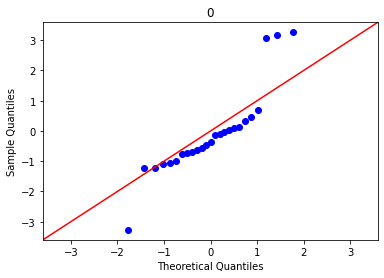

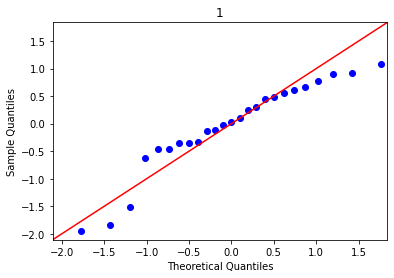

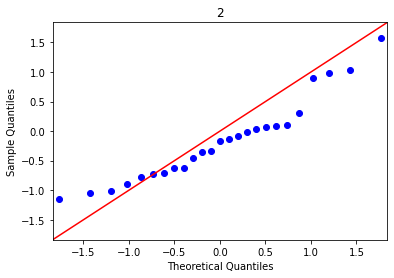

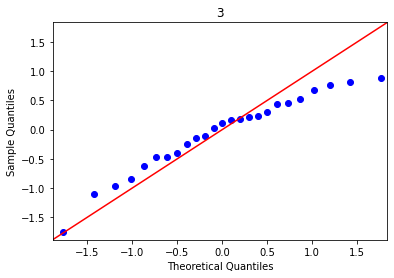

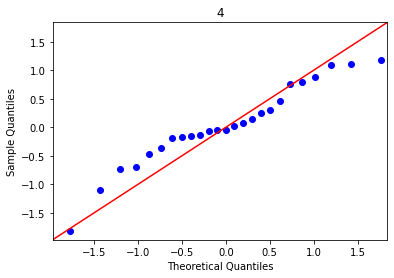

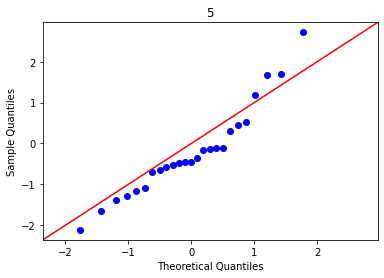

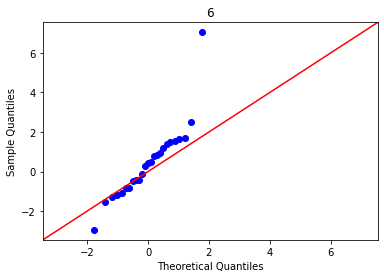

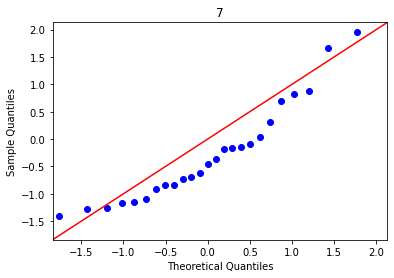

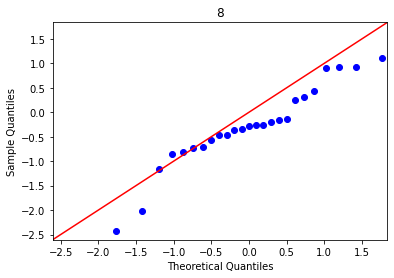

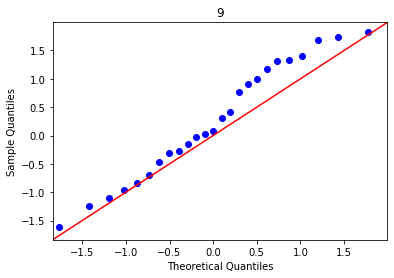

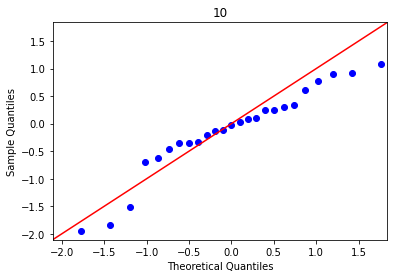

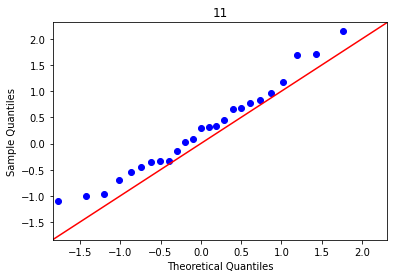

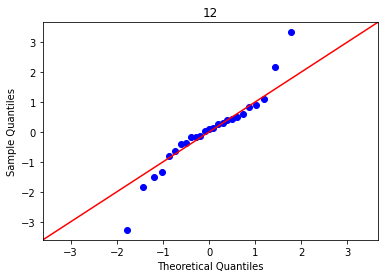

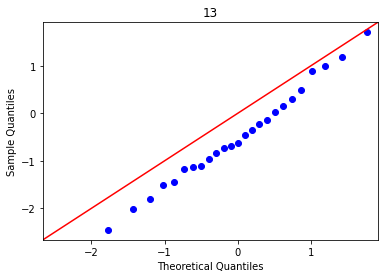

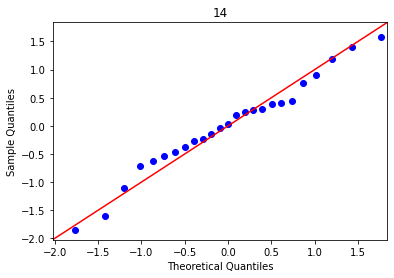

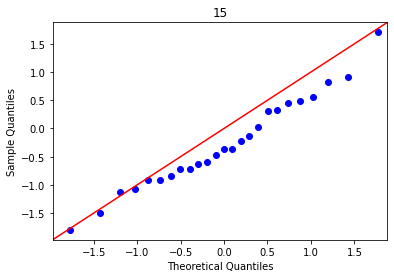

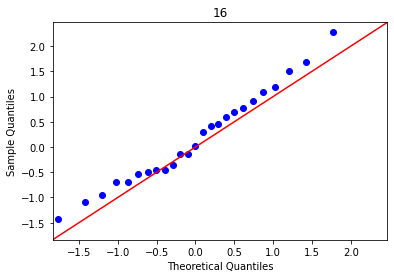

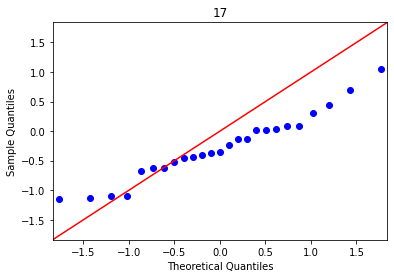

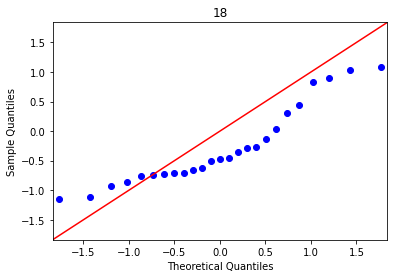

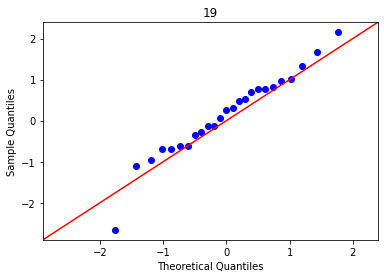

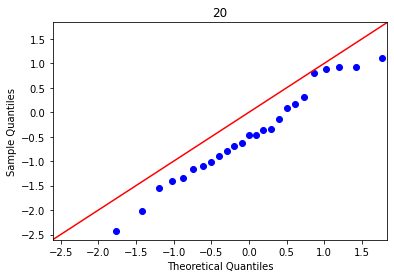

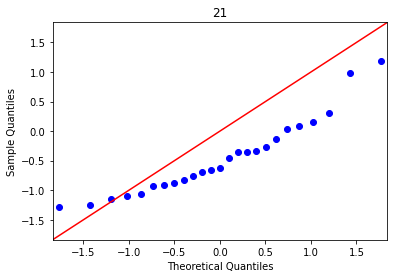

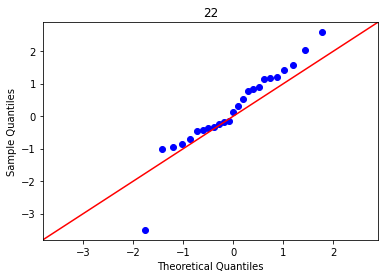

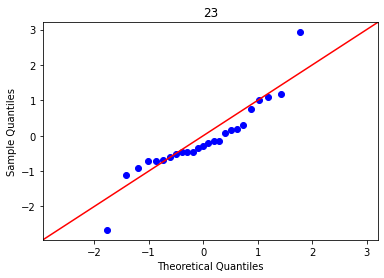

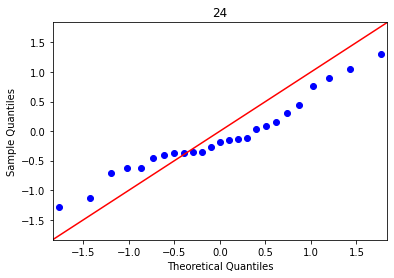

In [ ]:
for i in range(X_train_standard.shape[1]):
  sm.qqplot(X_train_standard[i], line='45')
  plt.title(i)
  plt.show()

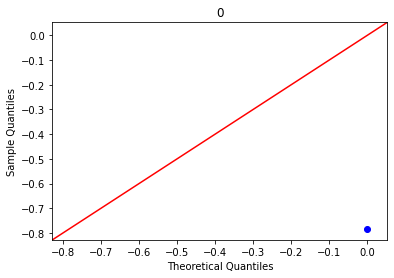

In [ ]:
for i in range(y_train_standard.shape[1]):
  sm.qqplot(y_train_standard[i], line='45')
  plt.title(i)
  plt.show()

#### Conjuntos de prueba

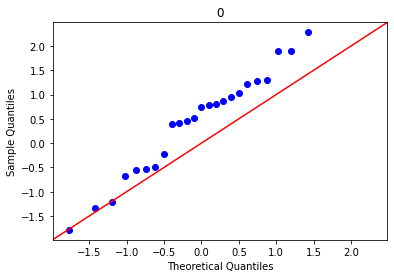

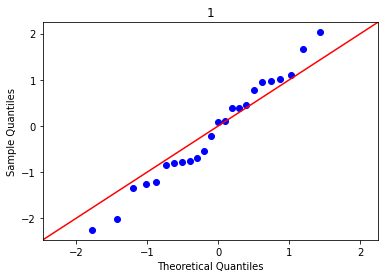

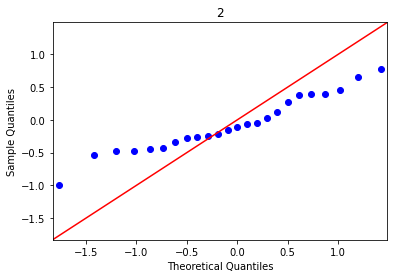

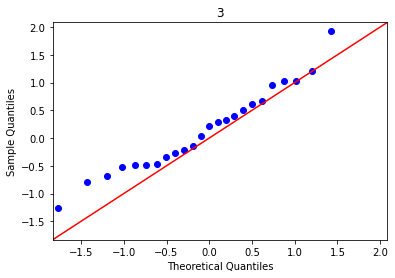

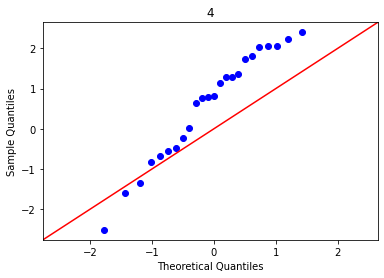

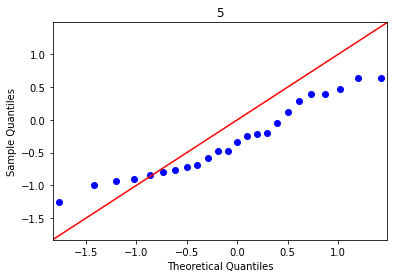

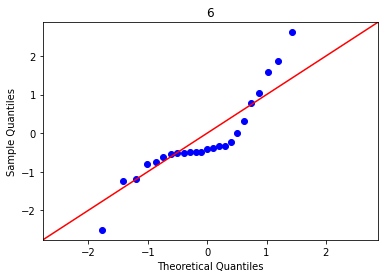

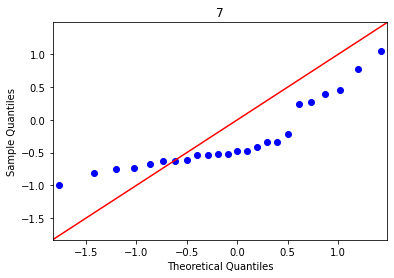

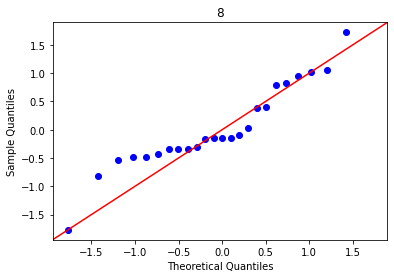

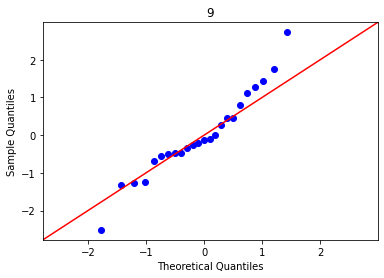

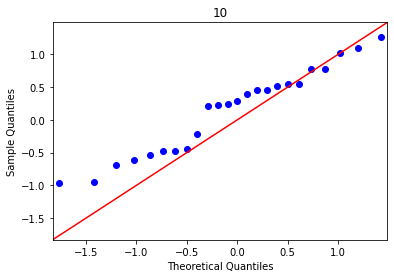

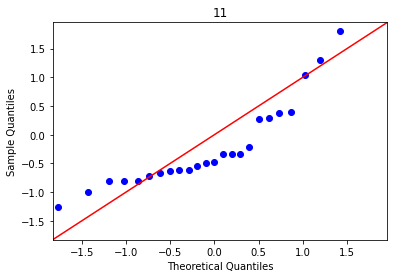

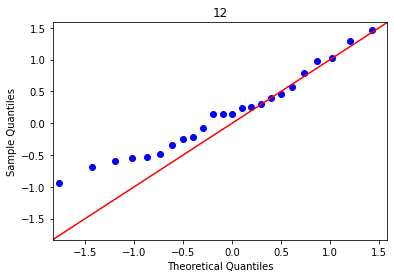

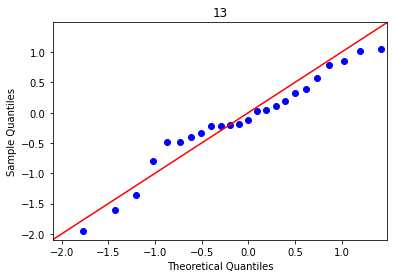

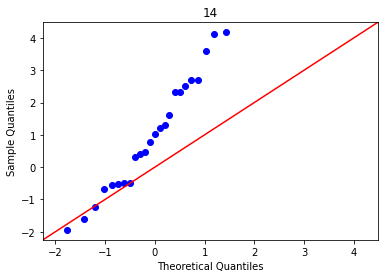

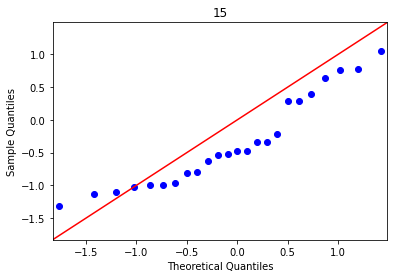

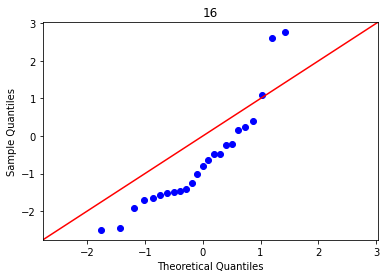

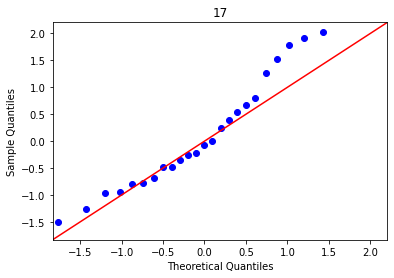

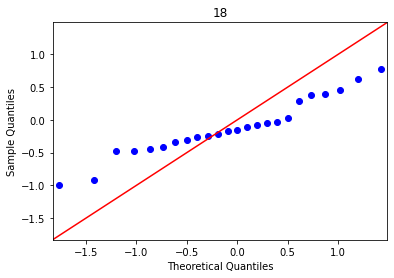

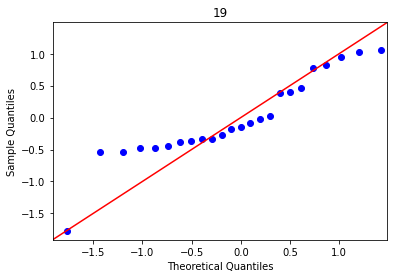

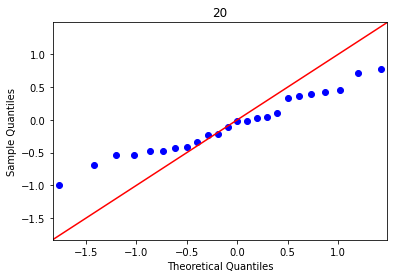

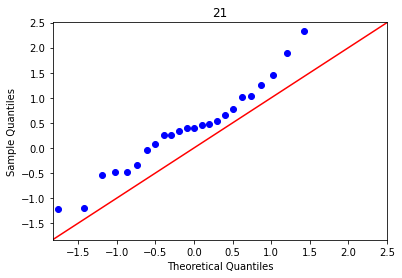

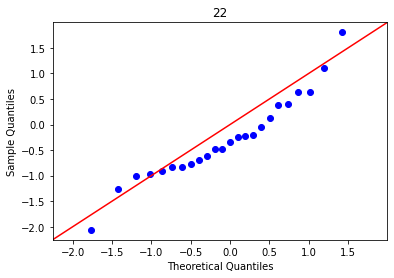

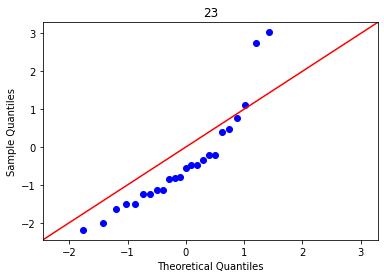

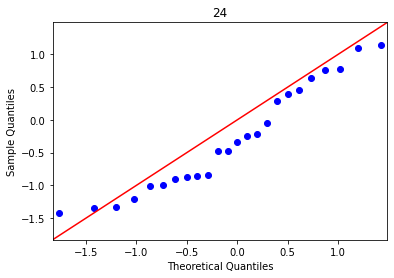

In [ ]:
for i in range(X_test_standard.shape[1]):
  sm.qqplot(X_test_standard[i], line='45')
  plt.title(i)
  plt.show()

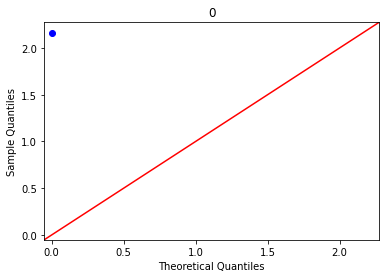

In [ ]:
for i in range(y_test_standard.shape[1]):
  sm.qqplot(y_test_standard[i], line='45')
  plt.title(i)
  plt.show()

### Truncamiento de datos atípicos

In [ ]:
# Valores fuera del intervalo [Percentil25 - 1.5*IQR, Percentil75 + 1.5*IQR] pueden ser considerados outliers
# IQR=Percentil75-Percentil25
factor = 1.5
bounds = {}

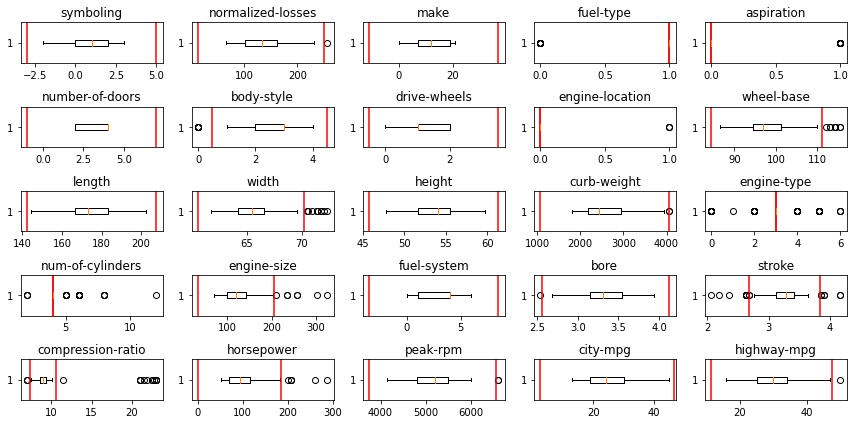

In [ ]:
# Visualización (boxplots) del intervalo por cada variable del conjunto de datos
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(X_train.columns):
    p25 = np.percentile(X_train[col], 25)
    p75 = np.percentile(X_train[col], 75)
    ri  = p75 - p25 
    
    lb = p25-(factor*ri)
    up = p75+(factor*ri)
    
    bounds.update({col:[lb,up]})
    
    fig.add_subplot(5,5,i+1)
    plt.boxplot(X_train[col],vert=False)
    plt.axvline(lb,color='red')
    plt.axvline(up,color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Truncamiento de los valores atípicos por cada variable
X_train2 = X_train.copy()
for col in X_train2.columns:
    X_train2.loc[X_train2[col]>=bounds[col][1], col] = bounds[col][1]

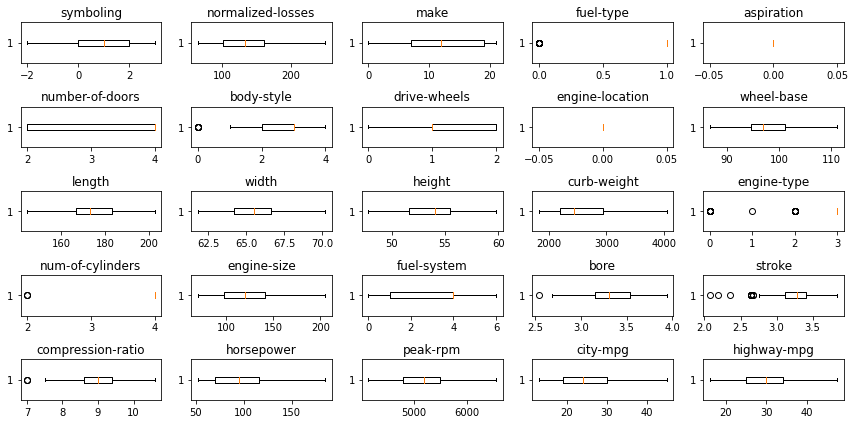

In [ ]:
# Visualización (boxplots) del conjunto de datos por variable después del truncamiento de los outliers
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(X_train2.columns):
    fig.add_subplot(5,5,i+1)
    plt.boxplot(X_train2[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

### Eliminación de Outliers

#### Conjuntos de entrenamiento

In [ ]:
# Valores fuera del intervalo [Percentil25 - 1.5*IQR, Percentil75 + 1.5*IQR] pueden ser considerados outliers
# IQR=Percentil75-Percentil25
factor = 1.5
bounds = {}

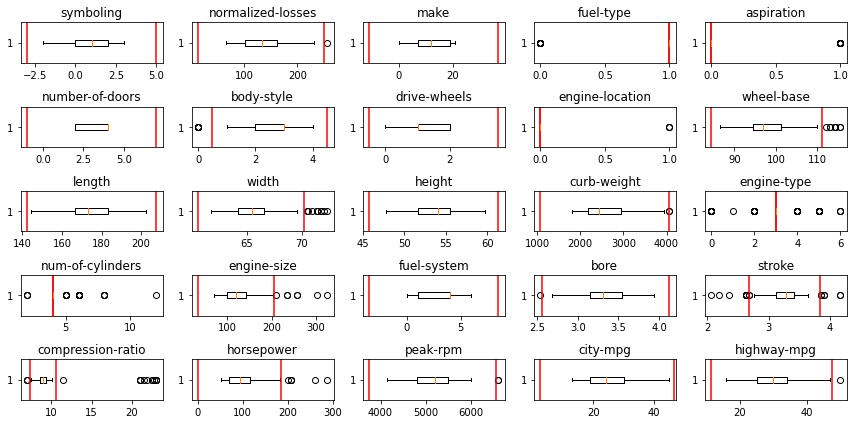

In [ ]:
# Visualización (boxplots) del intervalo por cada variable del conjunto de datos
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(X_train.columns):
    p25 = np.percentile(X_train[col], 25)
    p75 = np.percentile(X_train[col], 75)
    ri  = p75 - p25 
    
    lb = p25-(factor*ri)
    up = p75+(factor*ri)
    
    bounds.update({col:[lb,up]})
    
    fig.add_subplot(5,5,i+1)
    plt.boxplot(X_train[col],vert=False)
    plt.axvline(lb,color='red')
    plt.axvline(up,color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Eliminación de los valores atípicos por cada variable
X_train2 = X_train.copy()
for col in X_train2.columns:
    X_train2 = X_train2[X_train2[col].between(bounds[col][0], bounds[col][1])]

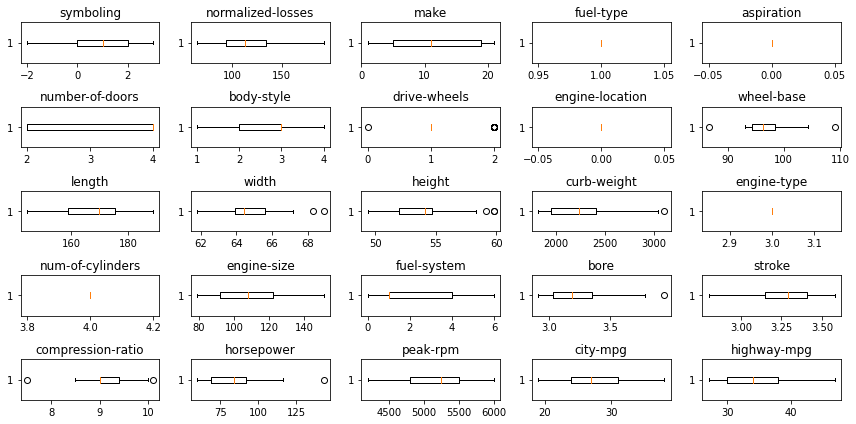

In [ ]:
# Visualización (boxplots) del conjunto de datos por variable después de la eliminación de los outliers
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(X_train2.columns):
    fig.add_subplot(5,5,i+1)
    plt.boxplot(X_train2[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

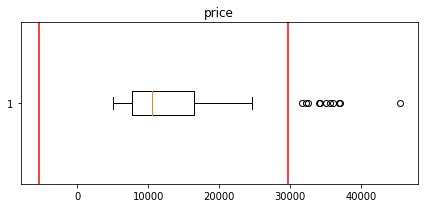

In [ ]:
# Visualización (boxplots) del intervalo por cada variable del conjunto de datos
factor = 1.5
bounds = {}

fig = plt.figure(figsize=(6,3))

for i,col in enumerate(y_train.columns):
    p25 = np.percentile(y_train[col], 25)
    p75 = np.percentile(y_train[col], 75)
    ri  = p75 - p25 
    
    lb = p25-(factor*ri)
    up = p75+(factor*ri)
    
    bounds.update({col:[lb,up]})
    
    fig.add_subplot(1,1,i+1)
    plt.boxplot(y_train[col],vert=False)
    plt.axvline(lb,color='red')
    plt.axvline(up,color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Eliminación de los valores atípicos en la variable dependiente
y_train2 = y_train.copy()
for col in y_train2.columns:
    y_train2 = y_train2[y_train2[col].between(bounds[col][0], bounds[col][1])]

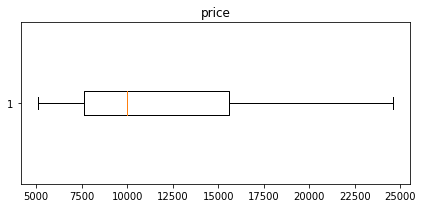

In [ ]:
# Visualización (boxplots) del conjunto de datos para la variable dependiente después de la eliminación de los outliers
fig = plt.figure(figsize=(6,3))

for i,col in enumerate(y_train2.columns):
    fig.add_subplot(1,1,i+1)
    plt.boxplot(y_train2[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

#### Conjuntos de prueba

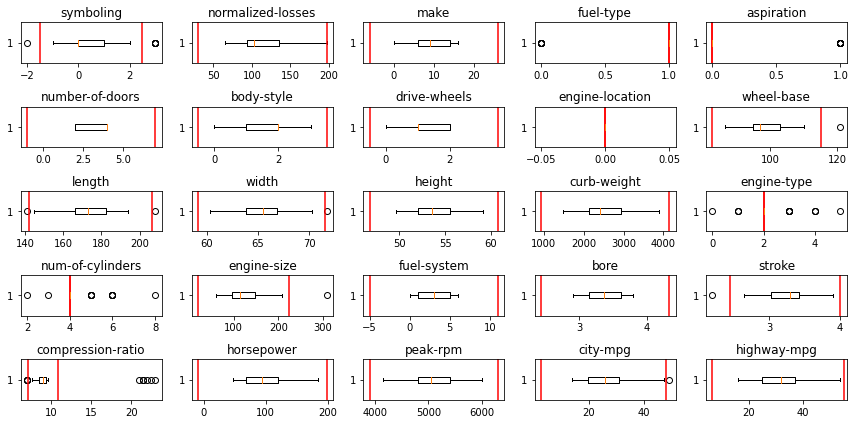

In [ ]:
# Visualización (boxplots) del intervalo por cada variable del conjunto de datos
factor = 1.5
bounds = {} 

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(X_test.columns):
    p25 = np.percentile(X_test[col], 25)
    p75 = np.percentile(X_test[col], 75)
    ri  = p75 - p25 
    
    lb = p25-(factor*ri)
    up = p75+(factor*ri)
    
    bounds.update({col:[lb,up]})
    
    fig.add_subplot(5,5,i+1)
    plt.boxplot(X_test[col],vert=False)
    plt.axvline(lb,color='red')
    plt.axvline(up,color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Eliminación de los valores atípicos por cada variable
X_test2 = X_test.copy()
for col in X_test2.columns:
    X_test2 = X_test2[X_test2[col].between(bounds[col][0], bounds[col][1])]

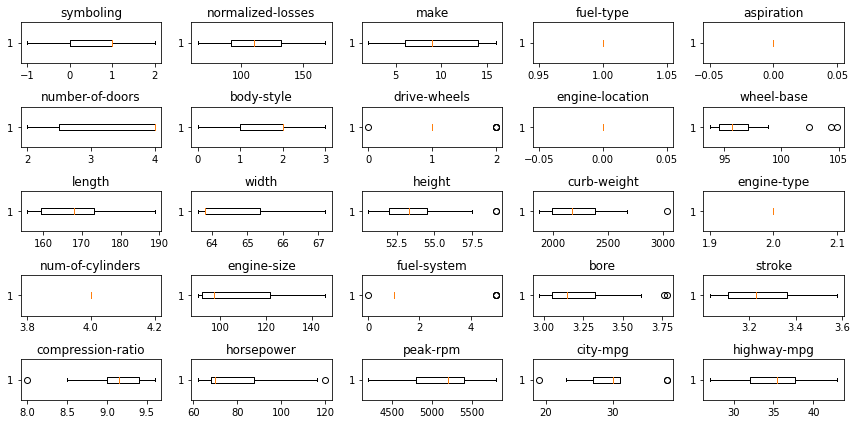

In [ ]:
# Visualización (boxplots) del conjunto de datos por variable después de la eliminación de los outliers
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(X_test2.columns):
    fig.add_subplot(5,5,i+1)
    plt.boxplot(X_test2[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

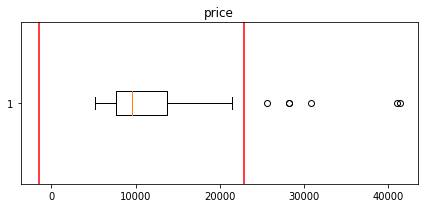

In [ ]:
# Visualización (boxplots) del intervalo por cada variable del conjunto de datos
factor = 1.5
bounds = {}

fig = plt.figure(figsize=(6,3))

for i,col in enumerate(y_test.columns):
    p25 = np.percentile(y_test[col], 25)
    p75 = np.percentile(y_test[col], 75)
    ri  = p75 - p25 
    
    lb = p25-(factor*ri)
    up = p75+(factor*ri)
    
    bounds.update({col:[lb,up]})
    
    fig.add_subplot(1,1,i+1)
    plt.boxplot(y_test[col],vert=False)
    plt.axvline(lb,color='red')
    plt.axvline(up,color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Eliminación de los valores atípicos en la variable dependiente
y_test2 = y_test.copy()
for col in y_test2.columns:
    y_test2 = y_test2[y_test2[col].between(bounds[col][0], bounds[col][1])]

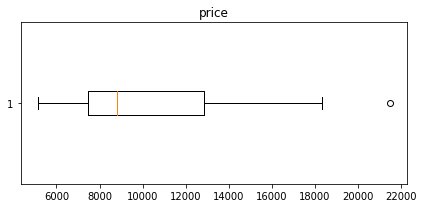

In [ ]:
# Visualización (boxplots) del conjunto de datos para la variable dependiente después de la eliminación de los outliers
fig = plt.figure(figsize=(6,3))

for i,col in enumerate(y_test2.columns):
    fig.add_subplot(1,1,i+1)
    plt.boxplot(y_test2[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

## Modelación

In [ ]:
# Diccionario que contiene los modelos a implementar para los datos
models = {
    "DecisionTree": DecisionTreeRegressor(max_depth=6.0, random_state=42),
    "RandomForest": RandomForestRegressor(max_depth=6.0, random_state=42),
}

train_scores = {}
test_scores = {}
new_prediction = {}

# Entrenamiento y evaluación de cada modelo con los conjuntos de entrenamiento y prueba
for model in models:
    models[model].fit(X_train, y_train)
    train_scores[model] = models[model].score(X_train, y_train)
    test_scores[model] = models[model].score(X_test, y_test)
    new_prediction[model] = models[model].predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [ ]:
# Porcentaje de precisión en la etapa de entrenamiento
sorted_scores1 = pd.Series(train_scores).sort_values(ascending = False)
print("-------------------------------------------")
print("Score in training")
print(sorted_scores1)
print("-------------------------------------------")

-------------------------------------------
Score in training
DecisionTree    0.983574
RandomForest    0.966200
dtype: float64
-------------------------------------------


In [ ]:
# Porcentaje de precisión en la etapa de prueba (con datos nunca antes vistos por los modelos)
sorted_scores = pd.Series(test_scores).sort_values(ascending = False)
print("-------------------------------------------")
print("Score in test")
print(sorted_scores)
print("-------------------------------------------")

-------------------------------------------
Score in test
RandomForest    0.888921
DecisionTree    0.782150
dtype: float64
-------------------------------------------


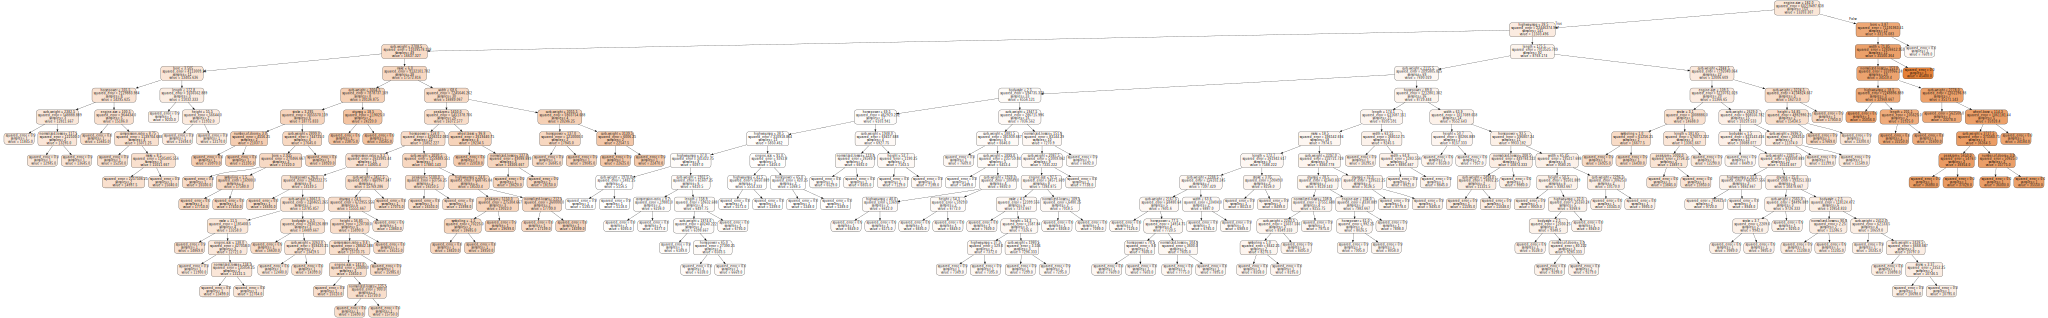

In [ ]:
from sklearn import tree
import graphviz

# Hyper parameter max depth
tree_clf = DecisionTreeRegressor()
tree_clf.fit(X_train,y_train)

# dot is a graph description language
dot = tree.export_graphviz(tree_clf, out_file=None, 
                           feature_names=X_train.columns,
                           class_names=y_train.price.values,
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph

### Random Forest 

In [ ]:
# Implementación del algoritmo base Random Forest con la visualización de 
# su matriz de confusión, accuracy score y recall score.
rfc = RandomForestRegressor(random_state=42)
rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)

print(rfc)
print('Score in test: \n {}'.format(rfc.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=42)
Score in test: 
 0.8887348739356804


#### Tuneo de hiperparámetros

In [ ]:
# Grid Search basado en Out-Of-Bag Score
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [100, 1000],
                 'max_features': [3, 5, 7, 9],
                 'max_depth'   : [None, 3, 6, 9],
                 'criterion'   : ['squared_error', 'absolute_error'],
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
#resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 9, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 9, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 9, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 9, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 9, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 9, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 9, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 3, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 3, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 5, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 7, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 7, 'n_estimators': 1000} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 9, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Modelo: {'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 9, 'n_estimators': 1000} ✓


,oob_accuracy,criterion,max_depth,max_features,n_estimators
0,0.838858,squared_error,NaN,3,100
1,0.857491,squared_error,NaN,3,1000
2,0.852581,squared_error,NaN,5,100
3,0.851739,squared_error,NaN,5,1000
4,0.840617,squared_error,NaN,7,100
...,...,...,...,...,...
59,0.856319,absolute_error,9.0,5,1000
60,0.846030,absolute_error,9.0,7,100
61,0.855100,absolute_error,9.0,7,1000
62,0.840168,absolute_error,9.0,9,100


In [ ]:
resultados.shape

(64, 5)

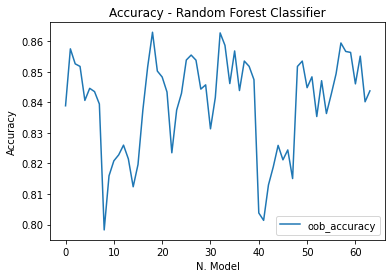

In [ ]:
resultados.plot(y = 'oob_accuracy', title = 'Accuracy - Random Forest Classifier', xlabel='N. Model', ylabel='Accuracy')

In [ ]:
resultados['oob_accuracy'].max()

0.8629173856594174

In [ ]:
resultados[resultados['oob_accuracy']==0.8629173856594174]

,oob_accuracy,criterion,max_depth,max_features,n_estimators
18,0.862917,squared_error,6.0,5,100


### Mejor Modelo

In [ ]:
# Implementación del algoritmo base Random Forest con la visualización de 
# su matriz de confusión, accuracy score y recall score.
rfc_best = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=6.0, 
                                 max_features=5, random_state=42)
rfc_best.fit(X_train, y_train)

rfc_predictions = rfc_best.predict(X_test)

print(rfc_best)

print('Score in train: \n {} \n Score in test: \n {}'.format(
    rfc_best.score(X_train, y_train), 
    rfc_best.score(X_test, y_test)))

RandomForestRegressor(max_depth=6.0, max_features=5, random_state=42)
Score in train: 
 0.9687508936611308 
 Score in test: 
 0.8317693171461668


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
